## Исследовательский анализ данных и проверка гипотез о бронировании билетов на сервисе Яндекс.Афиша

## Содержание проекта
- [Загрузка данных и знакомство с ними](#one)
- [Предобработка данных и подготовка их к исследованию](#two)
- [Исследовательский анализ данных](#three)
- [Статистический анализ данных](#four)
- [Общий вывод и рекомендации](#five)

## 1. Загрузка данных и знакомство с ними 
<a id='one'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

In [2]:
orders_df = pd.read_csv('/datasets/final_tickets_orders_df.csv')
events_df = pd.read_csv('/datasets/final_tickets_events_df.csv')

In [3]:
print(orders_df.info())
display(orders_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [4]:
print(events_df.info())
display(events_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB
None


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


В таблице `orders_df` 14 столбцов и 290849 строк, кроме столбца days_since_prev в данных пропусков не наблюдается. 
В таблице `events_df` 11 столбцов и 22427 строк, пропусков нет. Названия и содержимое стобцов соответствуют описанию.
Столбец created_ts_msk нужно привести к типу datetime. Можно снизить разрядность в столбцах  age_limit, tickets_count, days_since_prev, city_id. Изменить тип столбца days_since_prev на int. В столбце cinema_circuit значение 'нет' можно заменить на NaN. В столбце organizers можно удалить '№' перед числом.

## 2. Предобработка данных и подготовка их к исследованию  
<a id='two'></a>

In [5]:
df = orders_df.merge(events_df, on='event_id', how='inner')
print(f"Размер первого датафрейма:{orders_df.shape}")
print(f"Размер второго датафрейма:{events_df.shape}")
print(f"Размер объединенного датафрейма:{df.shape}")
df.isna().sum()#Количество пропусков

Размер первого датафрейма:(290849, 14)
Размер второго датафрейма:(22427, 11)
Размер объединенного датафрейма:(290611, 24)


order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21913
event_name                    0
event_type_description        0
event_type_main               0
organizers                    0
region_name                   0
city_name                     0
city_id                       0
venue_id                      0
venue_name                    0
venue_address                 0
dtype: int64

In [6]:
for column in ['event_type_main','event_type_description','region_name','city_name',
               'cinema_circuit','currency_code','device_type_canonical','service_name','venue_name','venue_address']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце event_type_main:
['выставки' 'другое' 'концерты' 'спорт' 'стендап' 'театр' 'ёлки']

Уникальные значения в столбце event_type_description:
['балет' 'выставка' 'концерт' 'кукольный спектакль'
 'музыкальный спектакль' 'мюзикл' 'опера' 'оперетта' 'подарок'
 'рок-мюзикл' 'снегурочка' 'событие' 'спектакль' 'спорт'
 'спортивное мероприятие' 'фестиваль' 'цирковое шоу' 'шоу' 'экскурсия'
 'ёлка']

Уникальные значения в столбце region_name:
['Белоярская область' 'Берестовский округ' 'Берёзовская область'
 'Боровлянский край' 'Верховинская область' 'Верхозёрский край'
 'Верхоречная область' 'Ветренский регион' 'Вишнёвский край'
 'Глиногорская область' 'Голубевский округ' 'Горицветская область'
 'Горноземский регион' 'Горностепной регион' 'Дальнеземская область'
 'Дальнезорский край' 'Дубравная область' 'Залесский край'
 'Заречная область' 'Зеленоградский округ' 'Златопольский округ'
 'Золотоключевской край' 'Зоринский регион' 'Каменевский регион'
 'Каменичская область

In [7]:
df['cinema_circuit'] = df['cinema_circuit'].replace('нет', np.nan)
df['organizers'] = df['organizers'].str.replace(r'^№\s*', '', regex=True)
df['tickets_count'] = pd.to_numeric(df['tickets_count'], downcast='integer')
df['age_limit'] = pd.to_numeric(df['age_limit'], downcast='integer')
df['city_id'] = pd.to_numeric(df['city_id'], downcast='integer')
df['days_since_prev'] = df['days_since_prev'].fillna(0).astype('int64')
df['days_since_prev'] = pd.to_numeric(df['days_since_prev'], downcast='integer')
df['created_ts_msk'] = pd.to_datetime(df['created_ts_msk'])
print(f"Количество явных дубликатов: {df.duplicated().sum()}") 
print(df.dtypes)

Количество явных дубликатов: 0
order_id                           int64
user_id                           object
created_dt_msk                    object
created_ts_msk            datetime64[ns]
event_id                           int64
cinema_circuit                    object
age_limit                           int8
currency_code                     object
device_type_canonical             object
revenue                          float64
service_name                      object
tickets_count                       int8
total                            float64
days_since_prev                    int16
event_name                        object
event_type_description            object
event_type_main                   object
organizers                        object
region_name                       object
city_name                         object
city_id                            int32
venue_id                           int64
venue_name                        object
venue_address             

In [8]:
#Удаляем неявные дубликаты
df['created_ts_rounded'] = df['created_ts_msk'].dt.floor('T')
columns_for_dup = [
    'user_id', 'created_ts_rounded', 'event_id', 'cinema_circuit',
    'age_limit', 'currency_code', 'device_type_canonical',
    'revenue', 'service_name', 'tickets_count', 'total',
    'event_type_main', 'region_name', 'city_id', 'venue_id'
]
duplicate_mask = df.duplicated(subset=columns_for_dup, keep=False)
df_duplicates = df[duplicate_mask]
print(f"Найдено неявных дубликатов: {df_duplicates.shape[0]}")

df1 = df.drop_duplicates(subset=columns_for_dup, keep='first')
df1 = df1.drop(columns=['created_ts_rounded'])
display(df_duplicates.head(5))

Найдено неявных дубликатов: 6038


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,created_ts_rounded
252,723377,043f4fd29dac324,2024-08-31,2024-08-31 23:24:22,509453,NaN,18,rub,mobile,1390.41,...,шоу,стендап,832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-08-31 23:24:00
259,723609,043f4fd29dac324,2024-08-31,2024-08-31 23:24:48,509453,NaN,18,rub,mobile,1390.41,...,шоу,стендап,832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-08-31 23:24:00
578,672975,a415326a7bb4b37,2024-09-13,2024-09-13 02:09:47,509453,NaN,18,rub,mobile,1853.87,...,шоу,стендап,832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-09-13 02:09:00
579,672917,a415326a7bb4b37,2024-09-13,2024-09-13 02:09:05,509453,NaN,18,rub,mobile,1853.87,...,шоу,стендап,832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-09-13 02:09:00
741,5914551,f8d6660efc1e213,2024-08-15,2024-08-15 20:27:05,509453,NaN,18,rub,mobile,1390.41,...,шоу,стендап,832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-08-15 20:27:00


Найдено неявных дубликатов: 6038. Строки за исключением order_id, одинаковые, различаются только во времени меньше минуты. То есть, заказы сделаны одним и тем же пользователем, на то же мероприятия, на ту же цену. Скорее всего, из-за сбоя в системе заказы продублировались.

In [9]:
df_rub = df1[df1['currency_code'] == 'rub']
df_kzt = df1[df1['currency_code'] == 'kzt']
print("RUB — revenue:")
print(df_rub['revenue'].describe())
print("\nRUB — tickets_count:")
print(df_rub['tickets_count'].describe())
print("\nKZT — revenue:")
print(df_kzt['revenue'].describe())
print("\nKZT — tickets_count:")
print(df_kzt['tickets_count'].describe())

RUB — revenue:
count    282461.000000
mean        550.243201
std         874.011028
min         -90.760000
25%         115.540000
50%         350.920000
75%         797.940000
max       81174.540000
Name: revenue, dtype: float64

RUB — tickets_count:
count    282461.000000
mean          2.754065
std           1.172483
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64

KZT — revenue:
count     5032.000000
mean      4964.755362
std       4893.245208
min          0.000000
25%        515.350000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

KZT — tickets_count:
count    5032.000000
mean        2.761129
std         1.115375
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: tickets_count, dtype: float64


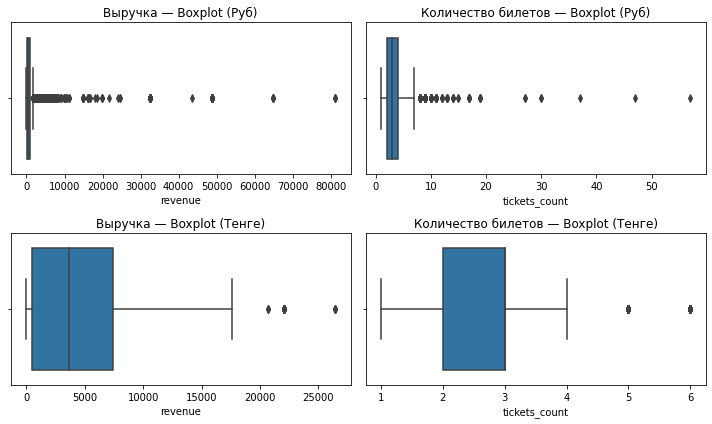

In [10]:
# Функция для графиков
def plot_boxplots_grid(df_rub, df_kzt):
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))
    sns.boxplot(x=df_rub['revenue'], ax=axes[0, 0])
    axes[0, 0].set_title('Выручка — Boxplot (Руб)')
    sns.boxplot(x=df_rub['tickets_count'], ax=axes[0, 1])
    axes[0, 1].set_title('Количество билетов — Boxplot (Руб)')
    sns.boxplot(x=df_kzt['revenue'], ax=axes[1, 0])
    axes[1, 0].set_title('Выручка — Boxplot (Тенге)')
    sns.boxplot(x=df_kzt['tickets_count'], ax=axes[1, 1])
    axes[1, 1].set_title('Количество билетов — Boxplot (Тенге)')
    plt.tight_layout()
    plt.show()

plot_boxplots_grid(df_rub, df_kzt)

In [11]:
rub_99 = df_rub['revenue'].quantile(0.99)
kzt_99 = df_kzt['revenue'].quantile(0.99)
df_rub_new = df_rub[df_rub['revenue'] <= rub_99]
df_kzt_new = df_kzt[df_kzt['revenue'] <= kzt_99]
df_new = pd.concat([df_rub_new, df_kzt_new], ignore_index=True)

In [12]:
tenge_df = pd.read_csv('/datasets/final_tickets_tenge_df.csv', parse_dates=['data'])
tenge_df = tenge_df[['data', 'curs']].rename(columns={'data': 'created_ts_msk'})
df_new = df_new.merge(tenge_df, on='created_ts_msk', how='left')
df_new['revenue_rub'] = df_new.apply(
    lambda row: row['revenue'] * (row['curs'] / 100) if row['currency_code'] == 'kzt' else row['revenue'], axis=1)
df_new.drop(columns=['curs'], inplace=True)

In [13]:
#Код ревьюера
print(df_new.revenue_rub.mean())
print(df_new.revenue.mean())

512.9697957381386
589.4770584557455


In [14]:
df_new['one_ticket_revenue_rub'] = df_new['revenue_rub'] / df_new['tickets_count']
df_new['month'] = df_new['created_ts_msk'].dt.month
df_new['month'] = pd.to_numeric(df_new['month'], downcast='integer')
def get_season(month):
    if 3 <= month <= 5:
        return 'весна'
    elif 6 <= month <= 8:
        return 'лето'
    elif 9 <= month <= 11:
        return 'осень'
    else:
        return 'зима'

df_new['season'] = df_new['created_ts_msk'].dt.month.apply(get_season)

In [15]:
print(df_new.info())
print(f"Размер датафрейма:{df_new.shape}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284694 entries, 0 to 284693
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                284694 non-null  int64         
 1   user_id                 284694 non-null  object        
 2   created_dt_msk          284694 non-null  object        
 3   created_ts_msk          284694 non-null  datetime64[ns]
 4   event_id                284694 non-null  int64         
 5   cinema_circuit          1353 non-null    object        
 6   age_limit               284694 non-null  int8          
 7   currency_code           284694 non-null  object        
 8   device_type_canonical   284694 non-null  object        
 9   revenue                 284694 non-null  float64       
 10  service_name            284694 non-null  object        
 11  tickets_count           284694 non-null  int8          
 12  total                   284694

В датасете пропусков, явных дубликатов не найдено. Найдено неявных дубликатов: 6038. Дублирующиеся значения без учета order_id, совершенные с разницей меньше минуты.
Столбец created_ts_msk привели к типу datetime. Изменили тип столбца days_since_prev на int. В столбцах age_limit, tickets_count, days_since_prev, city_id снизили разрядность.
В столбце cinema_circuit значение 'нет' заменили на NaN. В столбце organizers удалили '№' перед числом.
В данных имеются выбросы в выручке и количестве билетов. Выбросы в выручке заменили на значения 99 перцентиля.
Были добавлены новые стобцы: revenue_rub (выручка с заказа в рублях), one_ticket_revenue_rub(выручка с одного билета), 
month (месяц заказа), season(сезон заказа-'лето', 'осень', 'зима', 'весна').
В новом датасете 28 стобцов и 284694 строки.

## 3. Исследовательский анализ данных 
<a id='three'></a>

### 3.1. Анализ распределения заказов по сегментам и их сезонные изменения

Text(0, 0.5, 'Количество заказов')

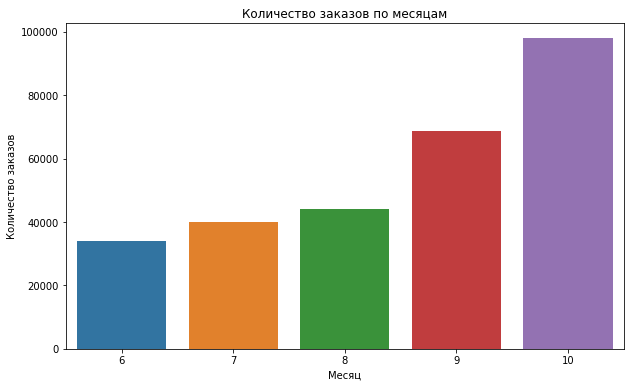

In [16]:
orders_per_month = df_new.groupby('month')['order_id'].nunique().reset_index()
orders_per_month.rename(columns={'order_id': 'order_count'}, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=orders_per_month, x='month', y='order_count')
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')

Количество заказов от лета к осени растет. Пик заказов приходит на конец периода.

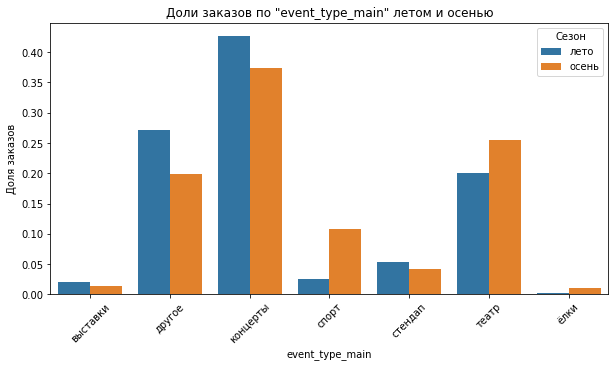

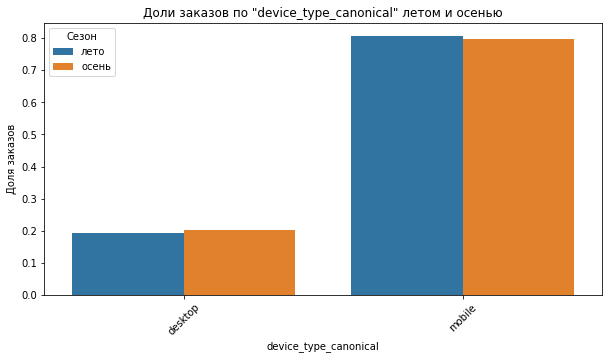

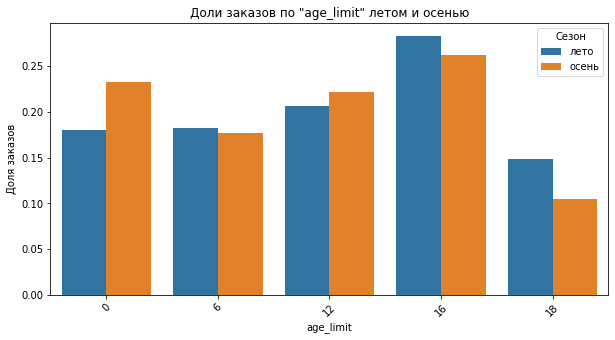

In [17]:
def calc_season_share(df, category_col):
    grouped = (
        df[df['season'].isin(['лето', 'осень'])]
        .groupby(['season', category_col])['order_id']
        .nunique()
        .reset_index()
        .rename(columns={'order_id': 'order_count'})
    )
    grouped['share'] = grouped.groupby('season')['order_count'].transform(lambda x: x / x.sum())
    return grouped
for category in ['event_type_main','device_type_canonical', 'age_limit']:
    data = calc_season_share(df_new, category)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(data=data, x=category, y='share', hue='season')
    plt.title(f'Доли заказов по "{category}" летом и осенью')
    plt.ylabel('Доля заказов')
    plt.xlabel(category)
    plt.xticks(rotation=45)
    plt.legend(title='Сезон')
    plt.show()

Доли заказов по типу мероприятий осенью больше чем летом в категориях спорт, театр и елки, остальные категории падают. Доли заказов по устройствам относительно не меняются. Доли заказов по возрастному ограничению падают осенью в категориях 6,16,18. В категориях 0, 12 растут. 

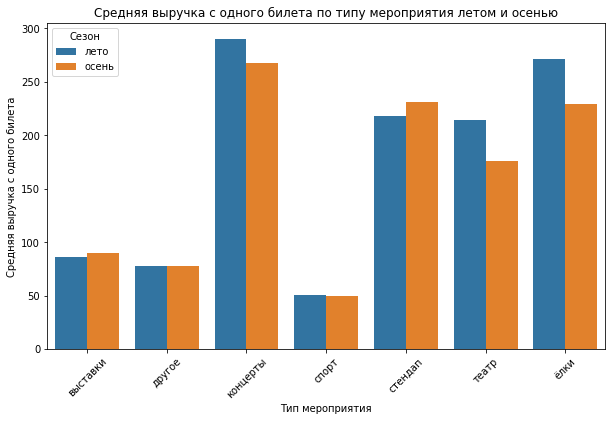

In [18]:
avg_revenue = (
    df_new
    .groupby(['season', 'event_type_main'])['one_ticket_revenue_rub']
    .mean()
    .reset_index())
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_revenue, x='event_type_main', y='one_ticket_revenue_rub', hue='season')
plt.title('Средняя выручка с одного билета по типу мероприятия летом и осенью')
plt.xlabel('Тип мероприятия')
plt.ylabel('Средняя выручка с одного билета')
plt.xticks(rotation=45)
plt.legend(title='Сезон')
plt.show()

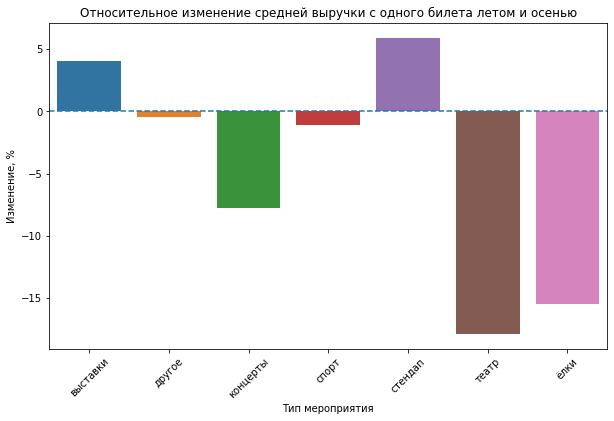

In [19]:
pivot_revenue = avg_revenue.pivot(index='event_type_main', columns='season', values='one_ticket_revenue_rub').reset_index()
pivot_revenue['relative_change'] = ((pivot_revenue['осень'] - pivot_revenue['лето']) / pivot_revenue['лето']) * 100
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_revenue, x='event_type_main', y='relative_change')
plt.axhline(0, linestyle='--')
plt.title('Относительное изменение средней выручки с одного билета летом и осенью')
plt.xlabel('Тип мероприятия')
plt.ylabel('Изменение, %')
plt.xticks(rotation=45)
plt.show()

Средняя выручка с одного билета по типу мероприятия в категориях выставки, спорт, другое остаются примерно те же. В категориях концерты, театр, елки падают. В категории стендап небольшой рост.
Относительное изменение средней выручки с одного билета показывает значительный упадок в категориях театр и ёлки осенью в сравнении с летом (-15%). Также падает средняя выручка в категории концерты (меньше 10%). Небольшой упадок в категориях спорт и другое(меньше 5%). И небольшой рост в категориях выставки, стендап(около  5%).

### 3.2. Осенняя активность пользователей

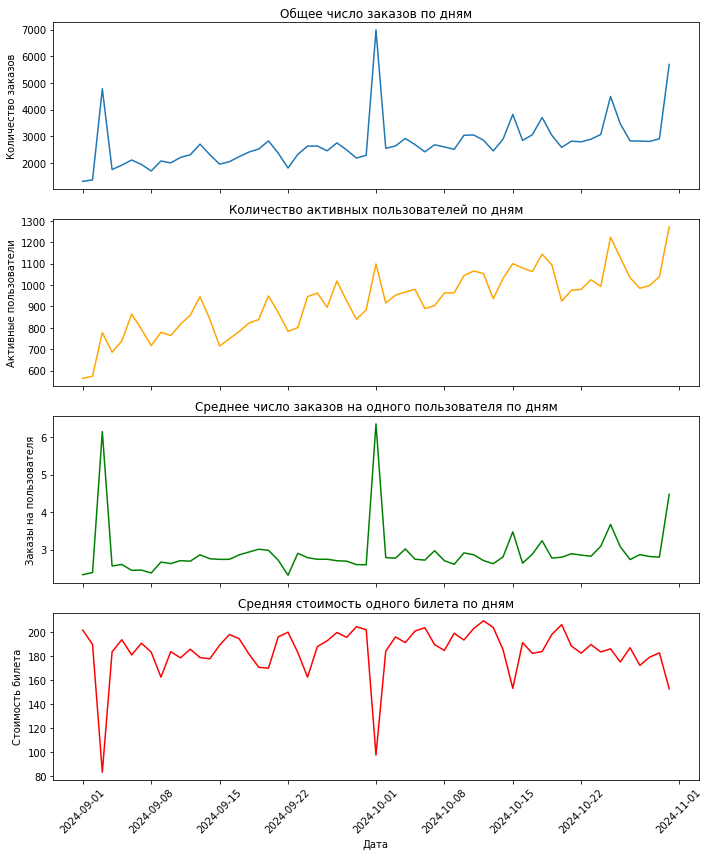

In [20]:
df_autumn = df_new[df_new['created_ts_msk'].dt.month.isin([9, 10])].copy()
daily_stats = df_autumn.groupby(df_autumn['created_ts_msk'].dt.date).agg(
    order_count=('order_id', 'nunique'),
    dau=('user_id', 'nunique'),
    avg_ticket_revenue=('one_ticket_revenue_rub', 'mean')
).reset_index().rename(columns={'created_ts_msk': 'date'})
daily_stats['orders_per_user'] = daily_stats['order_count'] / daily_stats['dau']
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
# Общее число заказов
axs[0].plot(daily_stats['date'], daily_stats['order_count'])
axs[0].set_title('Общее число заказов по дням')
axs[0].set_ylabel('Количество заказов')
# DAU
axs[1].plot(daily_stats['date'], daily_stats['dau'], color='orange')
axs[1].set_title('Количество активных пользователей по дням')
axs[1].set_ylabel('Активные пользователи')
# Среднее число заказов на пользователя
axs[2].plot(daily_stats['date'], daily_stats['orders_per_user'], color='green')
axs[2].set_title('Среднее число заказов на одного пользователя по дням')
axs[2].set_ylabel('Заказы на пользователя')
# Средняя стоимость одного билета
axs[3].plot(daily_stats['date'], daily_stats['avg_ticket_revenue'], color='red')
axs[3].set_title('Средняя стоимость одного билета по дням')
axs[3].set_ylabel('Стоимость билета')
axs[3].set_xlabel('Дата')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


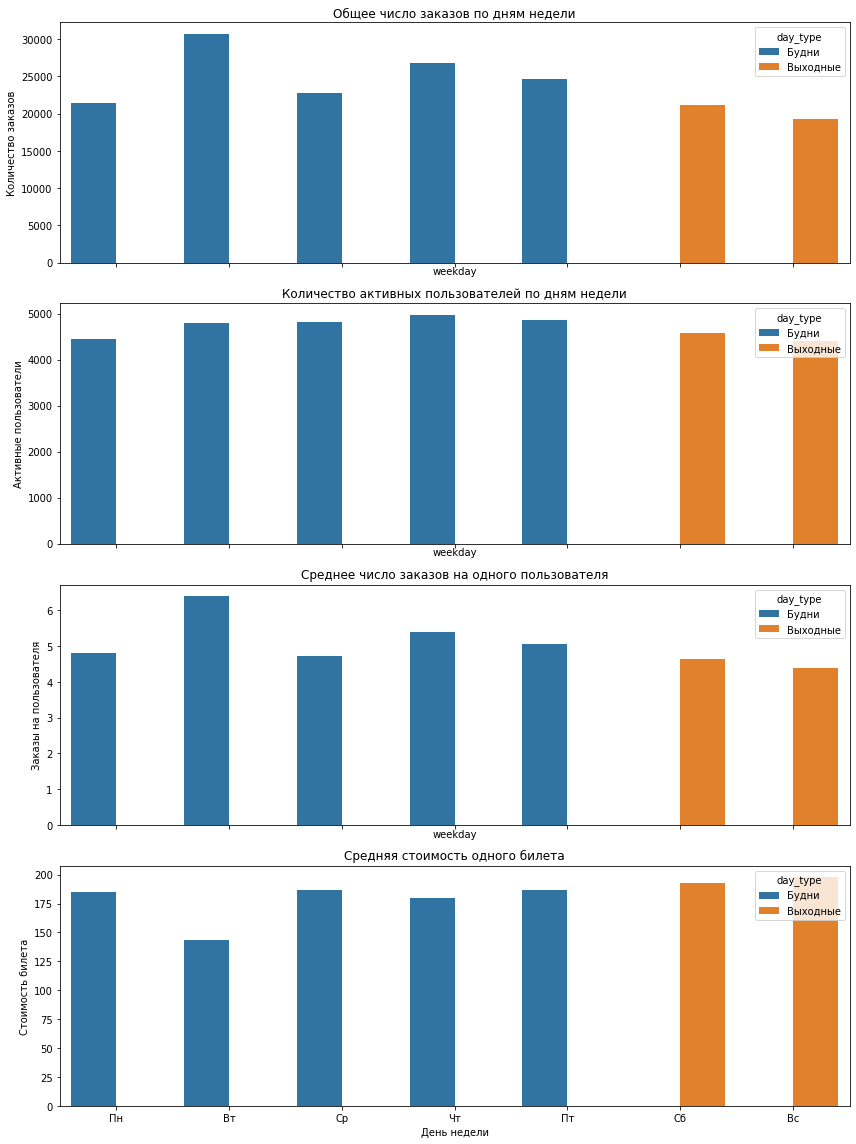

In [21]:
df_autumn['weekday'] = df_autumn['created_ts_msk'].dt.dayofweek
df_autumn['day_type'] = df_autumn['weekday'].apply(lambda x: 'Будни' if x < 5 else 'Выходные')
weekly_stats = df_autumn.groupby(['weekday', 'day_type']).agg(
    order_count=('order_id', 'nunique'),
    dau=('user_id', 'nunique'),
    avg_ticket_revenue=('one_ticket_revenue_rub', 'mean')
).reset_index()

weekly_stats['orders_per_user'] = weekly_stats['order_count'] / weekly_stats['dau']
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)
# Общее число заказов
sns.barplot(data=weekly_stats, x='weekday', y='order_count', hue='day_type', ax=axs[0])
axs[0].set_title('Общее число заказов по дням недели')
axs[0].set_ylabel('Количество заказов')
# DAU
sns.barplot(data=weekly_stats, x='weekday', y='dau', hue='day_type', ax=axs[1])
axs[1].set_title('Количество активных пользователей по дням недели')
axs[1].set_ylabel('Активные пользователи')
# Среднее число заказов на пользователя
sns.barplot(data=weekly_stats, x='weekday', y='orders_per_user', hue='day_type', ax=axs[2])
axs[2].set_title('Среднее число заказов на одного пользователя')
axs[2].set_ylabel('Заказы на пользователя')
# Средняя стоимость одного билета
sns.barplot(data=weekly_stats, x='weekday', y='avg_ticket_revenue', hue='day_type', ax=axs[3])
axs[3].set_title('Средняя стоимость одного билета')
axs[3].set_ylabel('Стоимость билета')
axs[3].set_xlabel('День недели')
axs[3].set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])

plt.tight_layout()
plt.show()

На графике общего числа заказов видно несколько пиков и спадов, характерных для разных дней. В целом количество заказов постепенно растет к концу периода. В количестве активных пользователей тоже наблюдается рост, но более плавный и стабильный. Среднее число заказов на одного пользователя обычно низкие с пиками, совпадающими с пиками заказов. Это означает, что в некоторые дни пользователи делают больше заказов. Средняя стоимость одного билета варьируется, но в целом остается относительно стабильной. Есть некоторые резкие падения, возможно, связанные с акциями или скидками.
В будние дни число заказов немного выше, чем в выходные. Пик по заказам приходится на вторник, а в выходные — чуть меньше. Количество активных пользователей в будние и выходные дни примерно одинаковое, но в будние дни чуть выше. В будние дни пользователи делают чуть больше заказов в среднем, чем в выходные. Средняя стоимость билета в выходные выше, чем в будни. 

### 3.3. Популярные события и партнёры

In [22]:
region_stats = df_new.groupby('region_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'nunique')
).reset_index()

total_unique_events = region_stats['unique_events'].sum()
total_orders = region_stats['total_orders'].sum()

region_stats['event_share'] = region_stats['unique_events'] / total_unique_events
region_stats['order_share'] = region_stats['total_orders'] / total_orders

region_stats['event_share'] = (region_stats['event_share'] * 100).round(2)
region_stats['order_share'] = (region_stats['order_share'] * 100).round(2)

region_stats = region_stats.sort_values(by='unique_events', ascending=False)
region_stats = region_stats.rename(columns={
    'region_name': 'Регион',
    'unique_events': 'Уникальные мероприятия',
    'total_orders': 'Число заказов',
    'event_share': 'Доля мероприятий (%)',
    'order_share': 'Доля заказов (%)'
})
display(region_stats)

,Регион,Уникальные мероприятия,Число заказов,Доля мероприятий (%),Доля заказов (%)
23,Каменевский регион,5935,88438,26.54,31.06
60,Североярская область,3800,43532,17.00,15.29
77,Широковская область,1232,16082,5.51,5.65
57,Светополянский округ,1075,7474,4.81,2.63
52,Речиновская область,702,6238,3.14,2.19
...,...,...,...,...,...
68,Теплоозёрский округ,2,7,0.01,0.00
66,Сосноводолинская область,2,10,0.01,0.00
33,Лесноярский край,2,19,0.01,0.01
56,Светолесский край,2,24,0.01,0.01


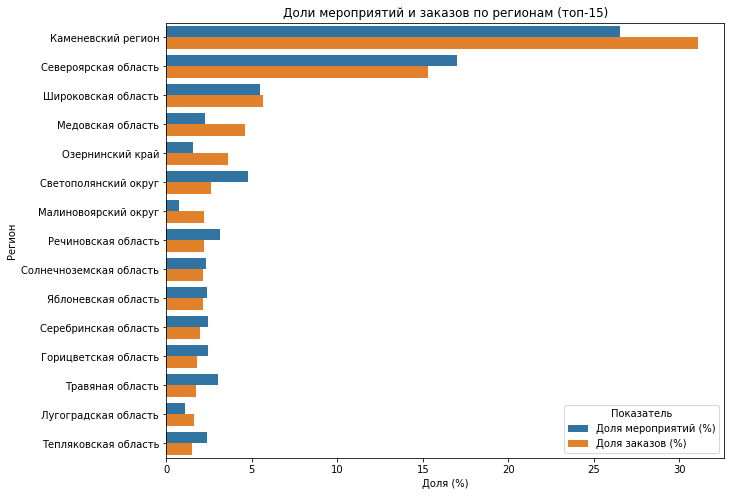

In [23]:
top_regions = region_stats.sort_values(by='Число заказов', ascending=False).head(15)

plot_data = top_regions.melt(id_vars='Регион', 
                             value_vars=['Доля мероприятий (%)', 'Доля заказов (%)'],
                             var_name='Показатель',
                             value_name='Доля (%)')

plt.figure(figsize=(10, 8))
sns.barplot(data=plot_data, y='Регион', x='Доля (%)', hue='Показатель')
plt.title('Доли мероприятий и заказов по регионам (топ-15)')
plt.show()

In [24]:
partner_stats = df_new.groupby('service_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'nunique'),
    total_revenue=('revenue_rub', 'sum')
).reset_index()

total_events = partner_stats['unique_events'].sum()
total_orders = partner_stats['total_orders'].sum()
total_revenue = partner_stats['total_revenue'].sum()

partner_stats['event_share'] = (partner_stats['unique_events'] / total_events * 100).round(2)
partner_stats['order_share'] = (partner_stats['total_orders'] / total_orders * 100).round(2)
partner_stats['revenue_share'] = (partner_stats['total_revenue'] / total_revenue * 100).round(2)

partner_stats = partner_stats.rename(columns={
    'service_name': 'Партнёр',
    'unique_events': 'Уникальные мероприятия',
    'total_orders': 'Число заказов',
    'total_revenue': 'Суммарная выручка',
    'event_share': 'Доля мероприятий (%)',
    'order_share': 'Доля заказов (%)',
    'revenue_share': 'Доля выручки (%)'
})
partner_stats = partner_stats.sort_values(by='Суммарная выручка', ascending=False)
display(partner_stats)

,Партнёр,Уникальные мероприятия,Число заказов,Суммарная выручка,Доля мероприятий (%),Доля заказов (%),Доля выручки (%)
3,Билеты без проблем,4247,62099,2.367052e+07,17.42,21.81,16.50
25,Облачко,2335,26285,1.850802e+07,9.58,9.23,12.90
24,Мой билет,1300,34029,1.765339e+07,5.33,11.95,12.30
21,Лови билет!,4867,40542,1.655116e+07,19.96,14.24,11.54
8,Весь в билетах,855,16314,1.643177e+07,3.51,5.73,11.45
5,Билеты в руки,3530,39394,1.305580e+07,14.48,13.84,9.10
19,Край билетов,252,6086,6.384504e+06,1.03,2.14,4.45
26,Прачечная,1026,9960,4.659466e+06,4.21,3.50,3.25
13,Дом культуры,272,4403,4.348803e+06,1.12,1.55,3.03
35,Яблоко,714,4969,3.842933e+06,2.93,1.75,2.68


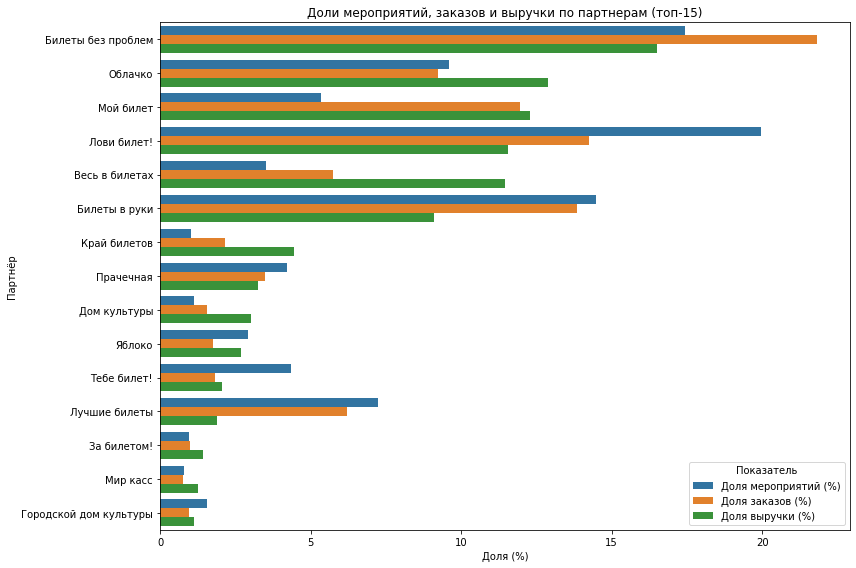

In [25]:
top_partners = partner_stats.sort_values(by='Суммарная выручка', ascending=False).head(15)

plot_data = top_partners.melt(
    id_vars='Партнёр',
    value_vars=['Доля мероприятий (%)', 'Доля заказов (%)', 'Доля выручки (%)'],
    var_name='Показатель',
    value_name='Доля (%)'
)

plt.figure(figsize=(12, 8))
sns.barplot(data=plot_data, y='Партнёр', x='Доля (%)', hue='Показатель')
plt.title('Доли мероприятий, заказов и выручки по партнерам (топ-15)')
plt.tight_layout()
plt.show()

Топ-3 региона:Каменевский регион,Североярская область, Широковская область обеспечивают почти 50% всех мероприятий. Каменевский регион — явный лидер по заказам и мероприятиям. В регионах Медовская область, Озернинский край, Широковская область, Каменевский регион доля заказов больше доли мероприятий, значит эти регионы показывают высокий спрос — мероприятий меньше, чем интереса пользователей. В регионах Светополянский округ, Травяная область, Речиновская область, Солнечноземская область много мероприятий, но мало заказов, значит мало спроса. Регионы с минимальным количеством мероприятий и заказов: Теплоозёрский округ, Сосноводолинская область, Лесноярский край, Светолесский край, Верхозёрский край. 
ТОП-5 партнёров: Мой билет, Билеты без проблем, Облачко, Лови билет!, Весь в билетах собирают более 69% всей выручки.
Платформы "Мой билет" и "Весь в билетах" при меньшем количестве заказов обеспечивают наивысшую выручку на заказ, что говорит об их ориентации на дорогие билеты или премиум-сегмент. Десятки партнёров с долей меньше 1%, например, "Тех билет", "Зе Бест!", "Лимоны".

## 4. Статистический анализ данных 
<a id='four'></a>

Нулевая гипотеза(H0): Среднее количество заказов на одного пользователя мобильного приложения меньше или равно, чем у пользователей стационарных устройств.

Альтернативная гипотеза(H1): Среднее количество заказов на одного пользователя мобильного приложения выше, чем у пользователей стационарных устройств.

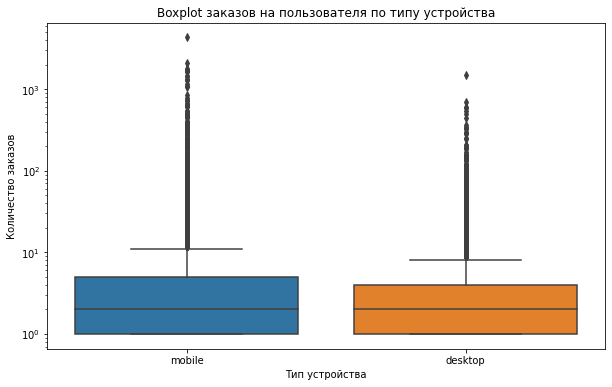

In [26]:
df_autumn = df_new[df_new['season'] == 'осень']
user_orders = df_autumn.groupby(['user_id', 'device_type_canonical'])['order_id'].count().reset_index()
user_orders.rename(columns={'order_id': 'orders_per_user'}, inplace=True)

mobile = user_orders[user_orders['device_type_canonical'] == 'mobile']['orders_per_user']
desktop = user_orders[user_orders['device_type_canonical'] == 'desktop']['orders_per_user']

plt.figure(figsize=(10, 6))
sns.boxplot(data=user_orders, x='device_type_canonical', y='orders_per_user')
plt.yscale('log')
plt.title("Boxplot заказов на пользователя по типу устройства")
plt.xlabel("Тип устройства")
plt.ylabel("Количество заказов")
plt.show()

In [27]:
summary = user_orders.groupby('device_type_canonical')['orders_per_user'].describe()
print(summary[['count', 'mean', '50%', 'std', 'max']])

                         count      mean  50%        std     max
device_type_canonical                                           
desktop                 4868.0  6.883320  2.0  34.875486  1479.0
mobile                 14192.0  9.377678  2.0  67.515509  4305.0


In [28]:
stat_mob, p_mob = shapiro(mobile)
stat_des, p_des = shapiro(desktop)
print(f'Mobile Shapiro-Wilk p-value: {p_mob:.5f}')
print(f'Desktop Shapiro-Wilk p-value: {p_des:.5f}')

Mobile Shapiro-Wilk p-value: 0.00000
Desktop Shapiro-Wilk p-value: 0.00000


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [29]:
metric_a = user_orders[user_orders['device_type_canonical'] == 'mobile']['orders_per_user']
metric_b = user_orders[user_orders['device_type_canonical'] == 'desktop']['orders_per_user']
alpha = 0.05

stat_mw, p_value_mw = mannwhitneyu(
    metric_a, 
    metric_b, 
    alternative='greater')

if p_value_mw > alpha:
    print(f'p-value = {p_value_mw} > alpha = {alpha}')
    print('Нулевая гипотеза находит подтверждение: среднее количество заказов не различается')
else:
    print(f'p-value = {p_value_mw} < alpha = {alpha}')
    print('Нулевая гипотеза не находит подтверждения: на мобильных устройствах больше заказов')

p-value = 3.188773640350095e-07 < alpha = 0.05
Нулевая гипотеза не находит подтверждения: на мобильных устройствах больше заказов


Выбранный тип t-теста: тест Манна — Уитни. Данные очень разбросаны и асимметричны, много выбросов. Среднее выше у мобильных, но медианы одинаковы. Из-за скошенности и выбросов нормальность вряд ли соблюдается, поэтому параметрические тесты могут дать неверные результаты. Проведенный Shapiro-Wilk тест показал, что распределение не является нормальным для обеих групп. Предпочтителен непараметрический тест Манна — Уитни.
Уровень статистической значимости: 0.05.
p-value = 0.00000.
Так как p-value < alpha, нулевая гипотеза не находит подтверждения, следовательно среднее количество заказов на пользователя мобильного приложения статистически значимо выше, чем у пользователей десктопных устройств.

Нулевая гипотеза(H0): Среднее время между заказами пользователей мобильного приложения меньше или равно, чем у пользователей стационарных устройств.

Альтернативная гипотеза(H1): Среднее время между заказами пользователей мобильного приложения выше, чем у пользователей стационарных устройств.

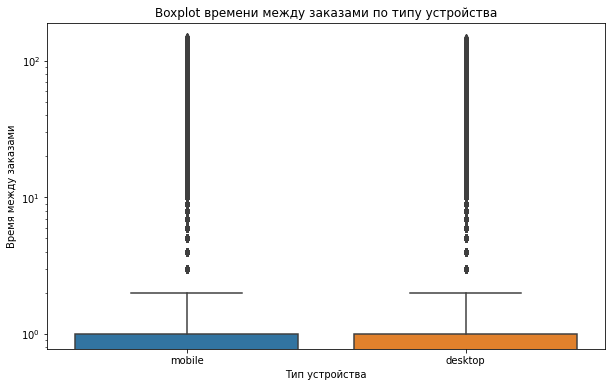

In [30]:
mobile_times = df_autumn[df_autumn['device_type_canonical'] == 'mobile']['days_since_prev']
desktop_times = df_autumn[df_autumn['device_type_canonical'] == 'desktop']['days_since_prev']
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_new[df_new['device_type_canonical'].isin(['mobile', 'desktop'])],
    x='device_type_canonical',
    y='days_since_prev'
)
plt.yscale('log')
plt.title("Boxplot времени между заказами по типу устройства")
plt.xlabel("Тип устройства")
plt.ylabel("Время между заказами")
plt.show()

In [31]:
summary1 = df_autumn.groupby('device_type_canonical')['days_since_prev'].describe()
print(summary1[['count', 'mean', '50%', 'std', 'max']])

                          count      mean  50%        std    max
device_type_canonical                                           
desktop                 33508.0  2.974424  0.0  11.999591  146.0
mobile                 133088.0  3.615382  0.0  13.111974  148.0


In [32]:
stat_mob, p_mob = shapiro(mobile_times)
stat_des, p_des = shapiro(desktop_times)
print(f'Mobile Shapiro-Wilk p-value: {p_mob:.5f}')
print(f'Desktop Shapiro-Wilk p-value: {p_des:.5f}')

Mobile Shapiro-Wilk p-value: 0.00000
Desktop Shapiro-Wilk p-value: 0.00000


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [33]:
metric_a = df_autumn[df_autumn['device_type_canonical'] == 'mobile']['days_since_prev']
metric_b = df_autumn[df_autumn['device_type_canonical'] == 'desktop']['days_since_prev']
alpha = 0.05

stat_mw, p_value_mw = mannwhitneyu(
    metric_a, 
    metric_b, 
    alternative='greater')

if p_value_mw > alpha:
    print(f'p-value = {p_value_mw} > alpha = {alpha}')
    print('Нулевая гипотеза находит подтверждение: среднее время между заказами не различается')
else:
    print(f'p-value = {p_value_mw} < alpha = {alpha}')
    print('Нулевая гипотеза не находит подтверждения: среднее время между заказами на мобильных устройствах больше')

p-value = 2.2948496926437368e-69 < alpha = 0.05
Нулевая гипотеза не находит подтверждения: среднее время между заказами на мобильных устройствах больше


Выбранный тип t-теста: тест Манна — Уитни. Время между заказами имеет много нулевых значений (медиана 0), распределение сильно скошено и содержит выбросы. Это видно и по графику boxplot. Классический t-тест требует приблизительно нормального распределения выборок. Shapiro-Wilk тест показал, что распределение не является нормальным для обеих групп. Значит, предпочтителен непараметрический тест Манна — Уитни. Уровень статистической значимости: 0.05. Так как p-value = 0.00000 < alpha = 0.05, нулевая гипотеза не находит подтверждения, следовательно среднее время между заказами у пользователей мобильного приложения статистически значимо выше, чем у пользователей десктопных устройств.

## 5. Общий вывод и рекомендации 
<a id='five'></a>

В проекте использовались данные о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года. Была проведена предобработка данных. Удалены неявные дубликаты, обработаны типы данных. В данных имеются выбросы в выручке и количестве билетов. Выбросы в выручке заменили на значения 99 перцентиля. Были добавлены новые стобцы: revenue_rub (выручка с заказа в рублях), one_ticket_revenue_rub(выручка с одного билета), month (месяц заказа), season(сезон заказа-'лето', 'осень', 'зима', 'весна').

Анализ показал, что с лета к осени растёт общее число заказов. Осенью увеличилась доля заказов в категориях спорт, театр и елки, тогда как в других категориях спрос снизился. Средняя выручка с одного билета в концертах упала на 35%, в театре и елках — примерно на 15%, при этом выставки и стендап продемонстрировали небольшой рост.

Изучение пользовательской активности выявило, что заказы чаще совершаются в будние дни, особенно во вторник, с пиками числа заказов на отдельных пользователей. Мобильные пользователи делают больше заказов, но с большими интервалами между ними.

По регионам явными лидерами по заказам и мероприятиям стали Каменевский регион, Североярская и Широковская области, обеспечивающие почти половину событий. Среди партнёров лидируют «Мой билет» и «Весь в билетах», обеспечивающие высокую выручку на заказ, что указывает на ориентацию на премиум-сегмент.

Проверка гипотез подтвердила статистически значимое различие в среднем числе заказов между пользователями мобильных и десктопных устройств, а также выявила различие в среднем времени между заказами. Среднее количество заказов и среднее время между заказами у пользователей мобильного приложения выше, чем у пользователей стационарных устройств.

Рекомендуется сосредоточиться на увеличении предложения и маркетинговой активности в регионах с высоким спросом, а также на поддержке и развитии премиум-платформ. Важно исследовать причины падения выручки в концертах и театре осенью и рассмотреть влияние акций и скидок на средний чек. Поскольку мобильные пользователи делают больше заказов, но с большими интервалами, стоит оптимизировать мобильное приложение для повышения частоты заказов — например, push-уведомления, персональные рекомендации, упрощение процесса покупки.